In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import drive

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Path ke data training dan testing
train_image_path = '/content/drive/MyDrive/Data_Skripsi_Akhir/Data_Skripsi_Akhir/Coba_Segmentasi/Training'
val_image_path = '/content/drive/MyDrive/Data_Skripsi_Akhir/Data_Skripsi_Akhir/Coba_Segmentasi/Validasi'
test_image_path = '/content/drive/MyDrive/Data_Skripsi_Akhir/Data_Skripsi_Akhir/Coba_Segmentasi/Testing'


In [ ]:

# Image data generator tanpa augmentasi, hanya rescale
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
# Load data training dan testing tanpa augmentasi
train_data = train_datagen.flow_from_directory(
    train_image_path,
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_image_path,
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_image_path,
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    shuffle=False
)

Found 5460 images belonging to 3 classes.
Found 2340 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
# Load model VGG16 pre-trained pada ImageNet tanpa lapisan top (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Membekukan lapisan convolutional dari model pre-trained
base_model.trainable = False


In [ ]:
# Menambahkan lapisan Dense untuk klasifikasi
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.7)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)


In [ ]:
# Membuat model akhir
vgg16_transfer_model = Model(inputs=base_model.input, outputs=output)



In [ ]:
# Kompilasi model
vgg16_transfer_model.compile(optimizer=Adam(learning_rate=0.0001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
# Menentukan steps_per_epoch dan validation_steps
train_steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = val_data.samples // val_data.batch_size




In [ ]:
# Tambahkan callback untuk Early Stopping
#early_stopping = EarlyStopping(
 #   monitor='val_accuracy',
  #  patience=5,
   # restore_best_weights=True
#)


In [ ]:
# Latih model
history = vgg16_transfer_model.fit(
    train_data,
    steps_per_epoch=train_steps_per_epoch,
    epochs=100,
    validation_data=val_data,
   # callbacks=[callbacks]  # Tambahkan callback di sini
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2226s 41s/step - accuracy: 0.4357 - loss: 1.5199 - val_accuracy: 0.6427 - val_loss: 0.6533
Epoch 2/100
 1/54 ━━━━━━━━━━━━━━━━━━━━ 24s 467ms/step - accuracy: 0.5500 - loss: 0.8967

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 257ms/step - accuracy: 0.5500 - loss: 0.8967 - val_accuracy: 0.6504 - val_loss: 0.6222
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 843ms/step - accuracy: 0.6568 - loss: 0.6727 - val_accuracy: 0.6957 - val_loss: 0.5380
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 259ms/step - accuracy: 0.7000 - loss: 0.6351 - val_accuracy: 0.6821 - val_loss: 0.5533
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 838ms/step - accuracy: 0.7095 - loss: 0.5650 - val_accuracy: 0.7714 - val_loss: 0.4842
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 261ms/step - accuracy: 0.7700 - loss: 0.4540 - val_accuracy: 0.7684 - val_loss: 0.4860
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 836ms/step - accuracy: 0.7423 - loss: 0.5017 - val_accuracy: 0.7944 - val_loss: 0.4538
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 273ms/step - accuracy: 0.8100 - loss: 0.4499 - val_accuracy: 0.8137 - val_loss: 0.4435
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 827ms/step - accuracy: 0.7790 - loss: 0.4418 - val_accuracy

In [ ]:
# Simpan history ke file TXT di Google Drive
import json

save_path = '/content/drive/MyDrive/Data_Skripsi_Akhir/Data_Skripsi_Akhir/Coba_Segmentasi/vgg16_training_history_100epoch.txt'

with open(save_path, 'w') as f:
    json.dump(history.history, f, indent=4)

print(f"Training history saved to '{save_path}'")


Training history saved to '/content/drive/MyDrive/Data_Skripsi_Akhir/Data_Skripsi_Akhir/Coba_Segmentasi/vgg16_training_history_100epoch.txt'


In [ ]:
model_save_path = '/content/drive/MyDrive/Data_Skripsi_Akhir/Data_Skripsi_Akhir/Coba_Segmentasi/Model/vgg16_transfer_model(100_epoch).h5'
vgg16_transfer_model.save(model_save_path)
print(f"Model terakhir telah disimpan di: {model_save_path}")

Model terakhir telah disimpan di: /content/drive/MyDrive/Data_Skripsi_Akhir/Data_Skripsi_Akhir/Coba_Segmentasi/Model/vgg16_transfer_model(100_epoch).h5


In [ ]:
# Evaluasi model pada data testing
test_loss, test_acc = vgg16_transfer_model.evaluate(test_data)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 38s 19s/step - accuracy: 0.7750 - loss: 0.7932
Test accuracy: 0.800000011920929
Test loss: 0.7443444132804871


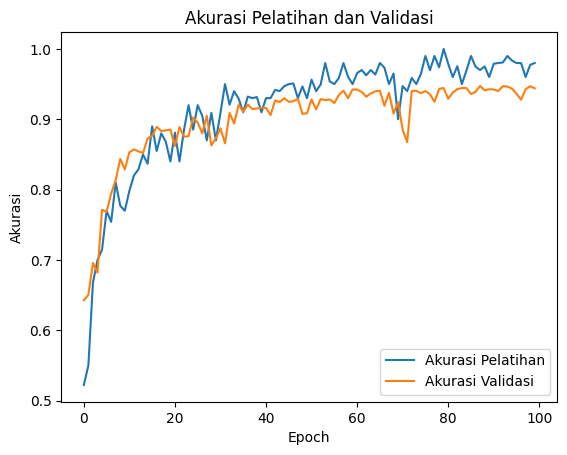

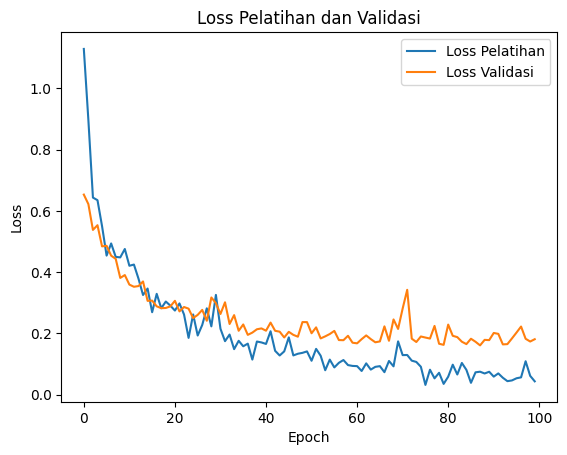

In [ ]:
import matplotlib.pyplot as plt

# Plot Akurasi
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 485ms/step


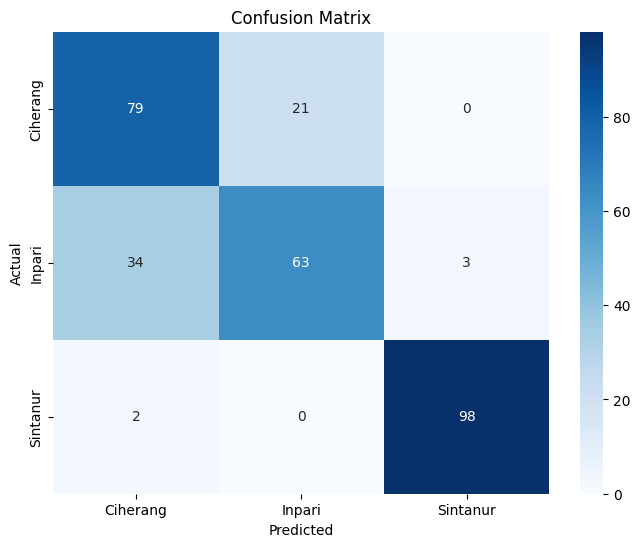

In [ ]:
# --- Tambahkan Confusion Matrix ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Prediksi data validasi
y_pred_probs = vgg16_transfer_model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Ambil label sebenarnya
y_true = test_data.classes

# Nama kelas
class_labels = list(test_data.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

# Laporan klasifikasi (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


Classification Report:
              precision    recall  f1-score   support

    Ciherang       0.69      0.79      0.73       100
      Inpari       0.75      0.63      0.68       100
    Sintanur       0.97      0.98      0.98       100

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



In [ ]:
# Menampilkan summary model
vgg16_transfer_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │        12,29

 Total params: 373,389,131 (1.39 GB)

 Trainable params: 119,558,147 (456.08 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 239,116,296 (912.16 MB)